The Pima Indians Diabetes Dataset that comes originally from the National Institute of Diabetes and Digestive and Kidney Disease. The data is available in a single csv file but since it is real world data it contains a number of null values. The assignment follows the workflow of a simple data science project and you will use a K-nearest neighbor classifier for the following 10 tasks. 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

random_state = 42

In [2]:
df = pd.read_csv('pima-indians-diabetes.csv')

In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## A. Pre-processing

**Task 1**: Replace all null values in the data frame (apart from values in the Pregnancies and Outcome columns) by NaN, then display the head of the data frame and print out the number of missing values for each feature.  [1 mark]

In [5]:
# Your code goes here.
df["Glucose"].replace(0, np.nan, inplace=True)
df["BloodPressure"].replace(0, np.nan, inplace=True)
df["SkinThickness"].replace(0, np.nan, inplace=True)
df["Insulin"].replace(0, np.nan, inplace=True)
df["BMI"].replace(0, np.nan, inplace=True)
df["DiabetesPedigreeFunction"].replace(0, np.nan, inplace=True)
df['Age'].replace(0, np.nan, inplace=True)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [6]:
# Your code goes here.
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

**Task 2**: Import the SimpleImputer class from sklearn.impute, then use the mean as strategy to replace all NaNs, fit and transform the modfied data frame (using the fit_transform() function) and print again the number of missing values for each feature. [1 mark]

In [7]:
# Your code goes here.
from sklearn.impute import SimpleImputer
s_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer_data = s_imputer.fit_transform(df)
df = pd.DataFrame(imputer_data, columns = df.columns)


In [8]:
# Your code goes here.
print ("Number of missing Values per Feature:")
df.isna().sum()

Number of missing Values per Feature:


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## B. Scaling

Distribution of values before scaling

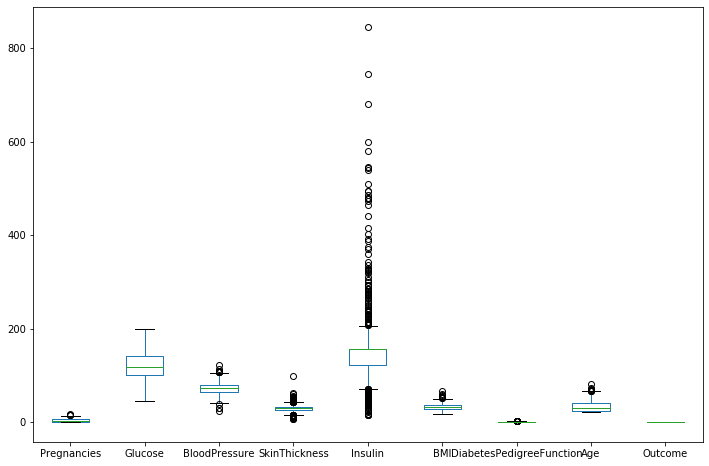

In [9]:
df.plot(kind='box', figsize=(12, 8));

**Train 3:** Import the MinMaxScaler scaler class from sklearn.preprocessing, fit and transform the data and plot the normalised data (using a box plot) in order to display the distribution of values after scaling. [1 mark]

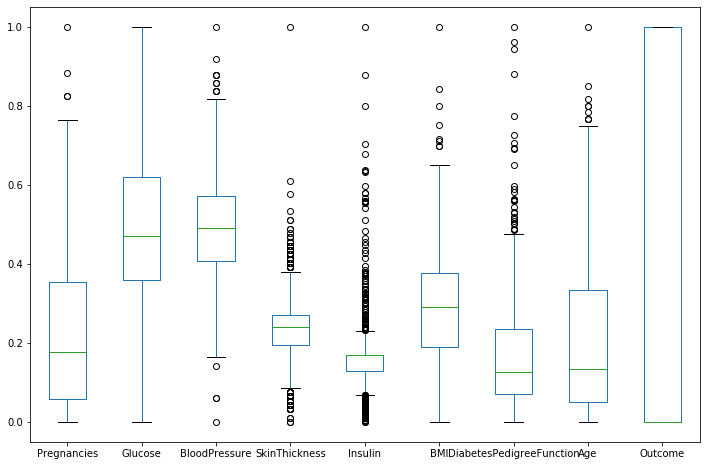

In [10]:
# Your code goes here.
from sklearn.preprocessing import MinMaxScaler
col_names = list(df.columns)
mm_scaler = preprocessing.MinMaxScaler()
df_new = mm_scaler.fit_transform(df)
df_new = pd.DataFrame(df_new, columns=col_names)
df_new.plot(kind='box', figsize=(12, 8));

**Task 4**: Split the data frame into a training set (X_train, y_train) and a test set (X_test, y_test), use 0.33 as test size and the previously defined random_state parameter (42). [1 mark]

In [11]:
# Your code goes here.
from sklearn.model_selection import train_test_split

processed_features = df_new[['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]   
labels = df_new['Outcome']  

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.33, random_state=42)

# C. Train and Evaluate the Model

**Task 5**: Import the KNeighborsClassifier from sklearn.neighbors, set n_neighbors to 5, fit the model, make predications (using X_test) and report the accuracy of the classifier (using the accuracy_score() function from sklearn.metrics). [1 mark]

In [12]:
# Your code goes here.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)
print("Accuracy: {:.2f}".format(accuracy_score(y_test, prediction)))

Accuracy: 0.71


**Task 6:** Report precision, recall and f1-score for the classifier (using the classification_report() function from sklearn.metrics). [1 mark]

In [13]:
# Your code goes here.
from sklearn.metrics import classification_report
target_names = [' Outcome = 0', 'Outcome = 1']
print(classification_report(y_test, prediction,target_names=target_names))


              precision    recall  f1-score   support

 Outcome = 0       0.77      0.80      0.79       168
 Outcome = 1       0.58      0.55      0.56        86

    accuracy                           0.71       254
   macro avg       0.68      0.67      0.67       254
weighted avg       0.71      0.71      0.71       254



**Task 7:** Import the cross_value_score function from sklearn.model_selection, use 10-fold cross validation and report the accuracy of the classifier. [1 mark]

In [14]:
# Your code goes here.
from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn, processed_features, labels, cv=10)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

scores


Accuracy: 0.75 (+/- 0.11)


array([0.66233766, 0.80519481, 0.80519481, 0.68831169, 0.71428571,
       0.7012987 , 0.81818182, 0.81818182, 0.76315789, 0.75      ])

**Task 8**: Import the cross_val_predict function from sklearn.model_selection and compute again precision, recall and F1-score for the classifier. The output wil look similar to the output of Task 6. [1 mark]

In [15]:
# Your code goes here.
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(knn, processed_features, labels, cv=10)
y_pred
target_names = [' Outcome = 0', 'Outcome = 1']
print(classification_report(labels, y_pred,target_names=target_names))


              precision    recall  f1-score   support

 Outcome = 0       0.80      0.82      0.81       500
 Outcome = 1       0.65      0.62      0.64       268

    accuracy                           0.75       768
   macro avg       0.73      0.72      0.72       768
weighted avg       0.75      0.75      0.75       768



**Task 9**: Generate a confusion matrix and print the number of true negatives, false positives, false negatives, and true positives for the classification.

In [16]:
# Your code goes here.
from sklearn.metrics import  confusion_matrix
#print(confusion_matrix(labels, y_pred))

tn, fp, fn, tp = confusion_matrix(labels, y_pred).ravel()
print("True Negatives:",tn)
print("False Positives:",fp)
print("False Negatives:",fn)
print("True Positives:",tp)

True Negatives: 412
False Positives: 88
False Negatives: 102
True Positives: 166


**Task 10**: Evaluate alternative values for K and plot the error rate versus the K-values. 

Text(0, 0.5, 'Error Rate')

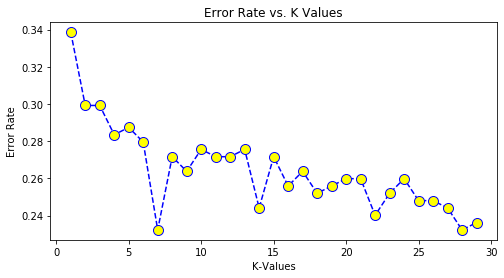

In [17]:
# Your code goes here.
error_rate = []
for i in range(1,30):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))
    
plt.figure(figsize=(8,4))
plt.plot(range(1,30),error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='yellow', markersize=10)
plt.title('Error Rate vs. K Values')
plt.xlabel('K-Values')
plt.ylabel('Error Rate')
    